In [1]:
import numpy as np
import matplotlib.pyplot as plt
from template import DummySpectroscopy
from pyquac_light import InteractiveSpectroscopyApp

# Random dummy data testing functionality

In [2]:
# Create sample data
x_arr = np.linspace(-1.0, 1.0, 11)  # Smaller grid for demo
y_arr = np.linspace(4e9, 5e9, 11)

# Create a SkeletonSpectroscopy instance
spec = DummySpectroscopy(x_arr=x_arr, y_arr=y_arr)

In [3]:
app = InteractiveSpectroscopyApp(spec)
app.get_widget()

# Real data loading and testing functionality

In [4]:
spec = DummySpectroscopy.load_csv("example_data.csv")

In [5]:
app = InteractiveSpectroscopyApp(spec)
app.get_widget()

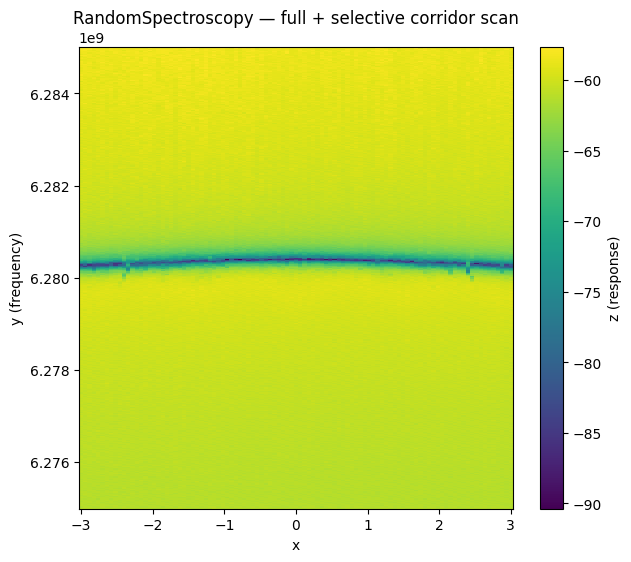

In [26]:
plt.figure(figsize=(7,6))
X, Y = np.meshgrid(spec.x_arr, spec.y_arr)
plt.pcolormesh(X, Y, spec.z_matrix, shading="auto")
plt.xlabel("x")
plt.ylabel("y (frequency)")
plt.title("RandomSpectroscopy — full + selective corridor scan")
plt.colorbar(label="z (response)")
plt.show()

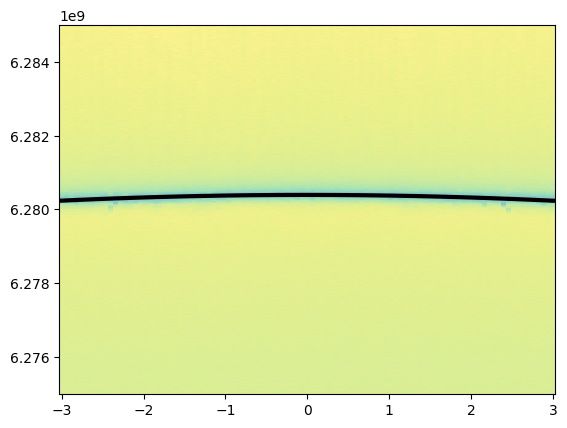

In [27]:
plt.pcolormesh(spec.x_arr, spec.y_arr, spec.z_matrix, shading="auto", alpha=0.5)

ridge = spec.fit_ridge(deg=2, x_subset=None)
plt.plot(spec.x_arr, ridge(spec.x_arr), c="black", lw=3)

In [28]:
# spec.clean_up(ridge, width_frac=0.1)
# plt.pcolormesh(spec.x_arr, spec.y_arr, spec.z_matrix, shading="auto", alpha=0.5, cmap="Blues")

In [29]:
idxs = np.arange(len((spec.x_arr)))
idx_remain = np.random.choice(idxs, 5)
mask = ~np.isin(idxs, idx_remain)
x_to_drop = spec.x_arr[mask]

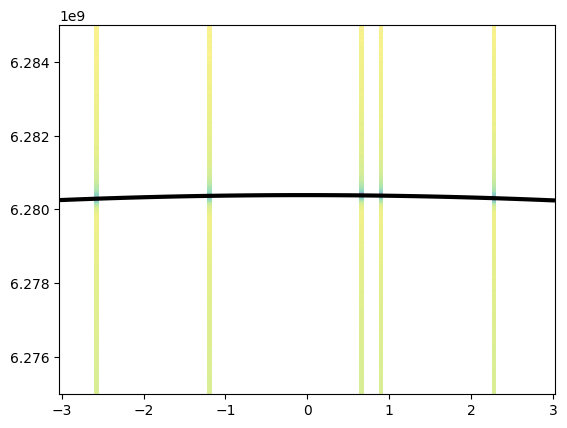

In [30]:
spec.drop(x=x_to_drop)
plt.pcolormesh(spec.x_arr, spec.y_arr, spec.z_matrix, shading="auto", alpha=0.5)

ridge = spec.fit_ridge(deg=2)
plt.plot(spec.x_arr, ridge(spec.x_arr), c="black", lw=3)